# New York City Flood Layers Download in Python
Author: Mark Bauer

In [1]:
# importing libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import urllib
import urllib.request
import requests

In [2]:
print('printing packages and versions:\n')

%reload_ext watermark
%watermark -v -p numpy,pandas,geopandas

printing packages and versions:

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy    : 1.23.1
pandas   : 1.4.3
geopandas: 0.11.1



In [3]:
# checking if data folder exist or not. 
if not os.path.exists("data/"): 
    os.makedirs("data/") 

# list items in data folder 
%ls data/

# Sandy Inundation Zone
https://data.cityofnewyork.us/Environment/Sandy-Inundation-Zone/uyj8-7rv5

![sandy-zone](images/sandy-zone.png)

In [4]:
# download url of dataset 
url = 'https://data.cityofnewyork.us/api/geospatial/uyj8-7rv5?method=export&format=Shapefile'
data = 'data/'

# download to data/ folder
fullfilename = os.path.join(data, 'sandy-inundation.zip')
urllib.request.urlretrieve(url, fullfilename)

%ls data/

sandy-inundation.zip


In [5]:
# read in file
path = 'data/sandy-inundation.zip'
sandy_gdf = gpd.read_file(path)

# examine data
print('shape of data: {}'.format(sandy_gdf.shape))
sandy_gdf.head()

shape of data: (492, 8)


,comments,demsource,id,sourcedata,state,status,verified,geometry
0,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((-74.23650 40.51920, -74.23651 40.519..."
1,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((-74.12753 40.54636, -74.12752 40.546..."
2,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((-73.91067 40.60621, -73.91068 40.606..."
3,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((-74.03144 40.60591, -74.03145 40.605..."
4,Surge extent clipped to 1000ft HSIP buffer,New York City OEM 1-meter,0.0,USGS Mission Assignment/HWM/Surge Sensor Data ...,New York,Final Field-Verified High Resolution,Yes,"POLYGON ((-73.98105 40.60790, -73.98104 40.607..."


In [6]:
# examine crs
sandy_gdf.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

<AxesSubplot:>

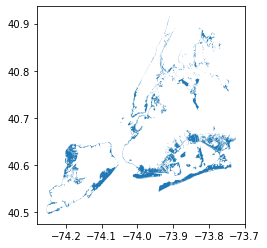

In [7]:
# sanity check plot
sandy_gdf.plot()

# Hurricane Evacuation Zones
Source: https://data.cityofnewyork.us/Public-Safety/Hurricane-Evacuation-Zones/uihr-hn7s

![hurricane-evac-zones](images/hurricane-evac-zones.png)

In [8]:
# download url of dataset
url = 'https://data.cityofnewyork.us/api/geospatial/uihr-hn7s?method=export&format=Shapefile'
data = 'data/'

# download to data/ folder
fullfilename = os.path.join(data, 'hurricane-zones.zip')
urllib.request.urlretrieve(url, fullfilename)

%ls data/

hurricane-zones.zip   sandy-inundation.zip


In [9]:
# read in file
path = 'data/hurricane-zones.zip'
hurricanes_gdf = gpd.read_file(path)

print('shape of data: {}'.format(hurricanes_gdf.shape))
hurricanes_gdf.head()

shape of data: (8, 4)


,hurricane_,shape_area,shape_leng,geometry
0,0,4.740026e+09,2.539842e+06,"MULTIPOLYGON (((-73.73838 40.59712, -73.73886 ..."
1,1,1.332012e+09,2.853847e+06,"MULTIPOLYGON (((-74.21178 40.50819, -74.21179 ..."
2,2,8.511473e+08,1.788935e+06,"MULTIPOLYGON (((-74.23843 40.50268, -74.23833 ..."
3,3,3.908593e+08,1.448826e+06,"MULTIPOLYGON (((-74.22929 40.50400, -74.23055 ..."
4,4,4.843452e+08,1.599283e+06,"MULTIPOLYGON (((-74.24885 40.50074, -74.24961 ..."


In [10]:
# examine crs
hurricanes_gdf.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

<AxesSubplot:>

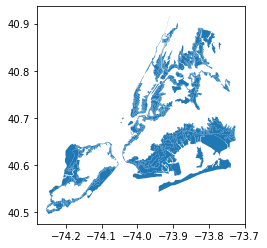

In [11]:
# sanity check plot, only plot hurricane categories
(hurricanes_gdf
 .loc[~hurricanes_gdf['hurricane_'].isin(['X', '0'])]
 .plot()
)

# NYC Stormwater Flood Map - Moderate Flood with Current Sea Levels
Source: https://data.cityofnewyork.us/Environment/NYC-Stormwater-Flood-Map-Moderate-Flood-with-Curre/7r5q-vr7p

![stormwater-moderate-y00](images/stormwater-moderate-y00.png)

In [12]:
# download url of dataset
url = 'https://data.cityofnewyork.us/download/7r5q-vr7p/application%2Fx-zip-compressed'
data = 'data/'

# download to data/ folder
fullfilename = os.path.join(data, 'stormwater-y00.zip')
urllib.request.urlretrieve(url, fullfilename)

%ls data/

hurricane-zones.zip   sandy-inundation.zip  stormwater-y00.zip


In [13]:
# read in file
file = 'data/stormwater-y00.zip!NYC Stormwater Flood Map - Moderate Flood with Current Sea Levels.gdb'
stormwater_current = gpd.read_file(file, low_memory=False)

# examine data
print('shape of data: {}'.format(stormwater_current.shape))
stormwater_current.head()

shape of data: (2, 4)


,Flooding_Category,Shape_Length,Shape_Area,geometry
0,1,6.456233e+06,7.937311e+07,"MULTIPOLYGON Z (((917257.748 120888.120 0.000,..."
1,2,2.601608e+06,4.119771e+07,"MULTIPOLYGON Z (((917182.612 120877.544 0.000,..."


In [14]:
# map codes to flood type
codes = {
    1:'Nuisance Flooding',
    2:'Deep and Contiguous Flooding',
    3:'Future High Tides 2080'
}

stormwater_current['flood_classification'] = stormwater_current['Flooding_Category'].replace(codes)

# check flood type
stormwater_current.head()

,Flooding_Category,Shape_Length,Shape_Area,geometry,flood_classification
0,1,6.456233e+06,7.937311e+07,"MULTIPOLYGON Z (((917257.748 120888.120 0.000,...",Nuisance Flooding
1,2,2.601608e+06,4.119771e+07,"MULTIPOLYGON Z (((917182.612 120877.544 0.000,...",Deep and Contiguous Flooding


In [15]:
# explode rows so each row is a polygon
stormwater_current = stormwater_current.explode(index_parts=True).reset_index(drop=True)
stormwater_current['Shape_Area'] = stormwater_current.area 
stormwater_current['Shape_Length'] = stormwater_current.length 

stormwater_current.head()

,Flooding_Category,Shape_Length,Shape_Area,flood_classification,geometry
0,1,269.023026,1479.465601,Nuisance Flooding,"POLYGON Z ((917257.748 120888.120 0.000, 91726..."
1,1,94.018586,347.203105,Nuisance Flooding,"POLYGON Z ((917257.748 120888.120 0.000, 91727..."
2,1,129.191396,658.602805,Nuisance Flooding,"POLYGON Z ((917423.697 120898.496 0.000, 91741..."
3,1,205.237509,1355.404896,Nuisance Flooding,"POLYGON Z ((917337.210 120971.030 0.000, 91734..."
4,1,338.975220,4429.263164,Nuisance Flooding,"POLYGON Z ((917156.306 120935.162 0.000, 91716..."


In [16]:
# examine crs
stormwater_current.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

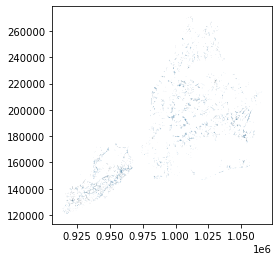

In [17]:
# sanity check plot
stormwater_current.plot()

# NYC Stormwater Flood Map - Moderate Flood with 2050 Sea Level Rise
Source: https://data.cityofnewyork.us/City-Government/NYC-Stormwater-Flood-Map-Moderate-Flood-with-2050-/5rzh-cyqd

![stormwater-moderate-y30](images/stormwater-moderate-y30.png)

In [18]:
# download url of dataset
url = 'https://data.cityofnewyork.us/download/5rzh-cyqd/application%2Fx-zip-compressed'
data = 'data/'

# download to data/ folder
fullfilename = os.path.join(data, 'stormwater-y30.zip')
urllib.request.urlretrieve(url, fullfilename)

%ls data/

hurricane-zones.zip   stormwater-y00.zip
sandy-inundation.zip  stormwater-y30.zip


In [19]:
# read in file
file = 'data/stormwater-y30.zip!NYC Stormwater Flood Map - Moderate Flood with 2050 Sea Level Rise.gdb'
stormwater_moderate = gpd.read_file(file, low_memory=False)

# examine data
print('shape of data: {}'.format(stormwater_moderate.shape))
stormwater_moderate.head()

shape of data: (3, 4)


,Flooding_Category,Shape_Length,Shape_Area,geometry
0,1,7.065402e+06,8.657528e+07,"MULTIPOLYGON Z (((917232.601 120841.554 0.000,..."
1,2,2.877719e+06,4.613496e+07,"MULTIPOLYGON Z (((917155.062 120828.741 0.000,..."
2,3,4.994691e+06,1.389420e+08,"MULTIPOLYGON Z (((915689.174 120243.672 0.000,..."


In [20]:
# map codes to flood type
codes = {
    1:'Nuisance Flooding',
    2:'Deep and Contiguous Flooding',
    3:'Future High Tides 2080'
}

stormwater_moderate['flood_classification'] = stormwater_moderate['Flooding_Category'].replace(codes)

# check flood type
stormwater_moderate.head()

,Flooding_Category,Shape_Length,Shape_Area,geometry,flood_classification
0,1,7.065402e+06,8.657528e+07,"MULTIPOLYGON Z (((917232.601 120841.554 0.000,...",Nuisance Flooding
1,2,2.877719e+06,4.613496e+07,"MULTIPOLYGON Z (((917155.062 120828.741 0.000,...",Deep and Contiguous Flooding
2,3,4.994691e+06,1.389420e+08,"MULTIPOLYGON Z (((915689.174 120243.672 0.000,...",Future High Tides 2080


In [21]:
# explode rows so each row is a polygon
stormwater_moderate = stormwater_moderate.explode(index_parts=True).reset_index(drop=True)
stormwater_moderate['Shape_Area'] = stormwater_moderate.area 
stormwater_moderate['Shape_Length'] = stormwater_moderate.length 

stormwater_moderate.head()

,Flooding_Category,Shape_Length,Shape_Area,flood_classification,geometry
0,1,23.523243,33.354365,Nuisance Flooding,"POLYGON Z ((917232.601 120841.554 0.000, 91723..."
1,1,36.241793,71.779885,Nuisance Flooding,"POLYGON Z ((917238.644 120854.459 0.000, 91722..."
2,1,138.842343,551.566475,Nuisance Flooding,"POLYGON Z ((917206.327 120862.559 0.000, 91721..."
3,1,104.069124,222.708746,Nuisance Flooding,"POLYGON Z ((917257.748 120888.120 0.000, 91726..."
4,1,94.019239,347.206795,Nuisance Flooding,"POLYGON Z ((917257.748 120888.120 0.000, 91727..."


In [22]:
# examine crs
stormwater_moderate.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

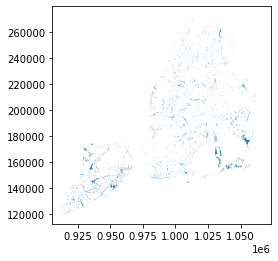

In [23]:
# sanity check plot
stormwater_moderate.plot()

# NYC Stormwater Flood Map - Extreme Flood with 2080 Sea Level Rise
Source: https://data.cityofnewyork.us/City-Government/NYC-Stormwater-Flood-Map-Extreme-Flood-with-2080-S/w8eg-8ha6

![stormwater-extreme-y60](images/stormwater-extreme-y60.png)

In [24]:
# download url of dataset
url = 'https://data.cityofnewyork.us/download/w8eg-8ha6/application%2Fx-zip-compressed'
data = 'data/'

# download to data/ folder
fullfilename = os.path.join(data, 'stormwater-y60.zip')
urllib.request.urlretrieve(url, fullfilename)

%ls data/

hurricane-zones.zip   stormwater-y00.zip    stormwater-y60.zip
sandy-inundation.zip  stormwater-y30.zip


In [25]:
# read in file
file = 'data/stormwater-y60.zip!NYC Stormwater Flood Map - Extreme Flood with 2080 Sea Level Rise.gdb'
stormwater_extreme = gpd.read_file(file, low_memory=False)

# examine data
print('shape of data: {}'.format(stormwater_extreme.shape))
stormwater_extreme.head()

shape of data: (3, 4)


,Flooding_Category,Shape_Length,Shape_Area,geometry
0,1,3.264384e+07,3.972152e+08,"MULTIPOLYGON Z (((917206.497 120931.611 0.000,..."
1,2,1.656489e+07,3.054550e+08,"MULTIPOLYGON Z (((917270.790 120873.747 0.000,..."
2,3,8.042525e+06,3.455846e+08,"MULTIPOLYGON Z (((915290.556 120269.389 0.000,..."


In [26]:
# map codes to flood type
codes = {
    1:'Nuisance Flooding',
    2:'Deep and Contiguous Flooding',
    3:'Future High Tides 2080'
}

stormwater_extreme['flood_classification'] = stormwater_extreme['Flooding_Category'].replace(codes)

# check flood type
stormwater_extreme.head()

,Flooding_Category,Shape_Length,Shape_Area,geometry,flood_classification
0,1,3.264384e+07,3.972152e+08,"MULTIPOLYGON Z (((917206.497 120931.611 0.000,...",Nuisance Flooding
1,2,1.656489e+07,3.054550e+08,"MULTIPOLYGON Z (((917270.790 120873.747 0.000,...",Deep and Contiguous Flooding
2,3,8.042525e+06,3.455846e+08,"MULTIPOLYGON Z (((915290.556 120269.389 0.000,...",Future High Tides 2080


In [27]:
# explode rows so each row is a polygon
stormwater_extreme = stormwater_extreme.explode(index_parts=True).reset_index(drop=True)
stormwater_extreme['Shape_Area'] = stormwater_extreme.area 
stormwater_extreme['Shape_Length'] = stormwater_extreme.length 

stormwater_extreme.head()

,Flooding_Category,Shape_Length,Shape_Area,flood_classification,geometry
0,1,51.436905,165.359700,Nuisance Flooding,"POLYGON Z ((917206.497 120931.611 0.000, 91720..."
1,1,37.622059,79.460913,Nuisance Flooding,"POLYGON Z ((917309.366 120950.899 0.000, 91730..."
2,1,14.432754,4.925173,Nuisance Flooding,"POLYGON Z ((917309.366 120950.899 0.000, 91730..."
3,1,54.817201,154.010850,Nuisance Flooding,"POLYGON Z ((917277.219 120938.040 0.000, 91726..."
4,1,24.392395,14.030167,Nuisance Flooding,"POLYGON Z ((917311.973 120963.757 0.000, 91730..."


In [28]:
# examine crs
stormwater_extreme.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

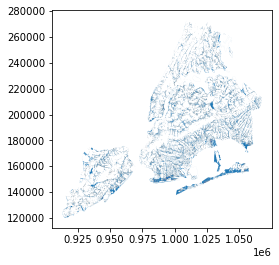

In [29]:
# sanity check plot
stormwater_extreme.plot()

# Sea Level Rise Maps (2020s 100-year Floodplain)
Source: https://data.cityofnewyork.us/Environment/Sea-Level-Rise-Maps-2020s-100-year-Floodplain-/ezfn-5dsb

![slr-rp100-y00](images/slr-rp100-y00.png)

In [30]:
# download url of dataset
url = 'https://data.cityofnewyork.us/api/geospatial/ezfn-5dsb?method=export&format=Shapefile'
data = 'data/'

# download to data/ folder
fullfilename = os.path.join(data, 'slr-rp100-y00.zip')
urllib.request.urlretrieve(url, fullfilename)

%ls data/

hurricane-zones.zip   slr-rp100-y00.zip     stormwater-y30.zip
sandy-inundation.zip  stormwater-y00.zip    stormwater-y60.zip


In [31]:
# read in file
path = 'data/slr-rp100-y00.zip'
slr_rp100_y00 = gpd.read_file(path)

# examine data
print('shape of data: {}'.format(slr_rp100_y00.shape))
slr_rp100_y00.head()

shape of data: (5982, 11)


,abfe_0_2pc,fld_zone,gridcode,id,join_count,orig_fid,shape_area,shape_leng,static_bfe,target_fid,geometry
0,0.0,None,900.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-73.91020 40.91784, -73.91020 40.917..."
1,0.0,None,900.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,"POLYGON ((-73.90993 40.91544, -73.91016 40.915..."
2,0.0,None,900.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,"POLYGON ((-73.91147 40.91345, -73.91147 40.913..."
3,0.0,None,1200.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,"POLYGON ((-73.91165 40.91283, -73.91875 40.912..."
4,0.0,None,1200.0,7.0,0.0,4.0,0.0,0.0,0.0,0.0,"POLYGON ((-73.91129 40.91256, -73.91165 40.912..."


In [32]:
# examine crs
slr_rp100_y00.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

<AxesSubplot:>

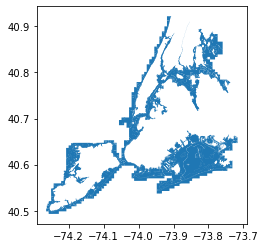

In [33]:
# sanity check plot
slr_rp100_y00.plot()

# Sea Level Rise Maps (2020s 500-year Floodplain)
Source: https://data.cityofnewyork.us/Environment/Sea-Level-Rise-Maps-2020s-500-year-Floodplain-/ajyu-7sgg

![slr-rp500-y00](images/slr-rp500-y00.png)

In [34]:
# download url of dataset
url = 'https://data.cityofnewyork.us/api/geospatial/ajyu-7sgg?method=export&format=Shapefile'
data = 'data/'

# download to data/ folder
fullfilename = os.path.join(data, 'slr-rp500-y00.zip')
urllib.request.urlretrieve(url, fullfilename)

%ls data/

hurricane-zones.zip   slr-rp500-y00.zip     stormwater-y60.zip
sandy-inundation.zip  stormwater-y00.zip
slr-rp100-y00.zip     stormwater-y30.zip


In [35]:
# read in file
path = 'data/slr-rp500-y00.zip'
slr_rp500_y00 = gpd.read_file(path)

# examine data
print('shape of data: {}'.format(slr_rp500_y00.shape))
slr_rp500_y00.head()

shape of data: (4484, 11)


,abfe_0_2pc,fld_zone,gridcode,id,join_count,orig_fid,shape_area,shape_leng,static_bfe,target_fid,geometry
0,21.0,VE,0.0,0.0,2.0,0.0,2.064166e+05,4114.613930,15.0,1.0,"POLYGON ((-74.24026 40.49848, -74.24049 40.498..."
1,19.0,AE,0.0,0.0,3.0,0.0,8.166030e+05,8607.972908,15.0,2.0,"POLYGON ((-74.25101 40.49952, -74.25092 40.499..."
2,19.0,AE,0.0,0.0,4.0,0.0,1.065738e+06,11729.390969,14.0,4.0,"POLYGON ((-74.23614 40.50175, -74.23608 40.501..."
3,0.0,None,1800.0,490.0,0.0,193.0,0.000000e+00,0.000000,0.0,0.0,"POLYGON ((-73.82391 40.84617, -73.82409 40.846..."
4,19.0,AE,0.0,0.0,1.0,0.0,6.331414e+05,10307.116230,13.0,3.0,"POLYGON ((-74.24040 40.50129, -74.24032 40.501..."


In [36]:
# examine crs
slr_rp500_y00.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

<AxesSubplot:>

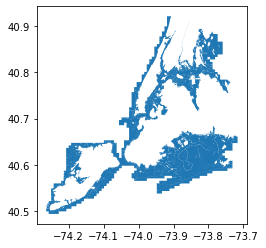

In [37]:
# sanity check plot
slr_rp500_y00.plot()

# Sea Level Rise Maps (2050s 100-year Floodplain)
Source: https://data.cityofnewyork.us/Environment/Sea-Level-Rise-Maps-2050s-100-year-Floodplain-/hbw8-2bah

![slr-rp100-y30](images/slr-rp100-y30.png)

In [38]:
# download url of dataset
url = 'https://data.cityofnewyork.us/api/geospatial/hbw8-2bah?method=export&format=Shapefile'
data = 'data/'

# download to data/ folder
fullfilename = os.path.join(data, 'slr-rp100-y30.zip')
urllib.request.urlretrieve(url, fullfilename)

%ls data/

hurricane-zones.zip   slr-rp100-y30.zip     stormwater-y30.zip
sandy-inundation.zip  slr-rp500-y00.zip     stormwater-y60.zip
slr-rp100-y00.zip     stormwater-y00.zip


In [39]:
# read in file
path = 'data/slr-rp100-y30.zip'
slr_rp100_y30 = gpd.read_file(path)

# examine data
print('shape of data: {}'.format(slr_rp100_y30.shape))
slr_rp100_y30.head()

shape of data: (10611, 8)


,abfe_0_2pc,fld_zone,gridcode,join_count,shape_area,shape_leng,static_bfe,geometry
0,0.0,None,900.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-73.90993 40.91544, -73.91000 ..."
1,0.0,None,900.0,0.0,0.0,0.0,0.0,"POLYGON ((-73.91138 40.91338, -73.91147 40.913..."
2,0.0,None,1200.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-73.91019 40.92018, -73.91126 ..."
3,0.0,None,900.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-73.91103 40.91260, -73.91101 ..."
4,0.0,None,1200.0,0.0,0.0,0.0,0.0,"POLYGON ((-73.91358 40.91144, -73.91368 40.911..."


In [40]:
# examine crs
slr_rp100_y30.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

<AxesSubplot:>

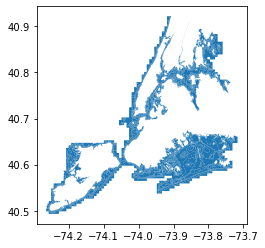

In [41]:
# sanity check plot
slr_rp100_y30.plot()

# Sea Level Rise Maps (2050s 500-year Floodplain)
Source: https://data.cityofnewyork.us/Environment/Sea-Level-Rise-Maps-2050s-500-year-Floodplain-/qwca-zqw3

![slr-rp500-y30](images/slr-rp500-y30.png)

In [42]:
# download url of dataset
url = 'https://data.cityofnewyork.us/api/geospatial/qwca-zqw3?method=export&format=Shapefile'
data = 'data/'

# download to data/ folder
fullfilename = os.path.join(data, 'slr-rp500-y30.zip')
urllib.request.urlretrieve(url, fullfilename)

%ls data/

hurricane-zones.zip   slr-rp100-y30.zip     stormwater-y00.zip
sandy-inundation.zip  slr-rp500-y00.zip     stormwater-y30.zip
slr-rp100-y00.zip     slr-rp500-y30.zip     stormwater-y60.zip


In [43]:
# read in file
path = 'data/slr-rp500-y30.zip'
slr_rp500_y30 = gpd.read_file(path)

# examine data
print('shape of data: {}'.format(slr_rp500_y30.shape))
slr_rp500_y30.head()

shape of data: (7055, 8)


,abfe_0_2pc,fld_zone,gridcode,join_count,shape_area,shape_leng,static_bfe,geometry
0,0.0,None,1500.0,0.0,0.0,0.0,0.0,"POLYGON ((-73.90993 40.91517, -73.91010 40.915..."
1,0.0,None,1300.0,0.0,0.0,0.0,0.0,"POLYGON ((-73.88825 40.89957, -73.88801 40.899..."
2,0.0,None,1300.0,0.0,0.0,0.0,0.0,"POLYGON ((-73.88852 40.89902, -73.88846 40.899..."
3,0.0,None,1300.0,0.0,0.0,0.0,0.0,"POLYGON ((-73.88861 40.89875, -73.88861 40.899..."
4,0.0,None,1300.0,0.0,0.0,0.0,0.0,"POLYGON ((-73.88861 40.89861, -73.88874 40.898..."


In [44]:
# examine crs
slr_rp500_y30.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

<AxesSubplot:>

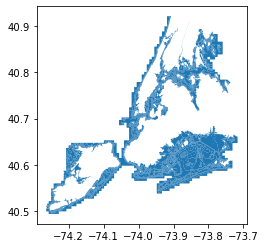

In [45]:
# sanity check plot
slr_rp500_y30.plot()

# New York City Effective Flood Insurance Rate Map (FIRM)
Source: https://msc.fema.gov/portal/advanceSearch

![fema-firm](images/fema-firm.png)

In [46]:
# url path from the web
product_id = 'NFHL_360497'
url = 'https://msc.fema.gov/portal/downloadProduct?productID={}'.format(product_id)
data = 'data/'

# download to data/ folder
fullfilename = os.path.join(data, 'fema-firm.zip')
urllib.request.urlretrieve(url, fullfilename)

%ls data/

fema-firm.zip         slr-rp100-y30.zip     stormwater-y30.zip
hurricane-zones.zip   slr-rp500-y00.zip     stormwater-y60.zip
sandy-inundation.zip  slr-rp500-y30.zip
slr-rp100-y00.zip     stormwater-y00.zip


In [47]:
# reading in file
path = 'data/fema-firm.zip!S_FLD_HAZ_AR.shp'
firm_gdf = gpd.read_file(path)

# examine data
print('shape of data: {}'.format(firm_gdf.shape))
firm_gdf.head()

shape of data: (2147, 20)


,DFIRM_ID,VERSION_ID,FLD_AR_ID,STUDY_TYP,FLD_ZONE,ZONE_SUBTY,SFHA_TF,STATIC_BFE,V_DATUM,DEPTH,LEN_UNIT,VELOCITY,VEL_UNIT,AR_REVERT,AR_SUBTRV,BFE_REVERT,DEP_REVERT,DUAL_ZONE,SOURCE_CIT,geometry
0,360497,1.1.1.0,360497_1,NP,X,AREA OF MINIMAL FLOOD HAZARD,F,-9999.0,None,-9999.0,None,-9999.0,None,None,None,-9999.0,-9999.0,None,360497_FIS1,"POLYGON ((-73.90080 40.56112, -73.90083 40.561..."
1,360497,1.1.1.0,360497_2,NP,X,AREA OF MINIMAL FLOOD HAZARD,F,-9999.0,None,-9999.0,None,-9999.0,None,None,None,-9999.0,-9999.0,None,360497_FIS1,"POLYGON ((-73.83838 40.76860, -73.83847 40.768..."
2,360497,1.1.1.0,360497_3,NP,X,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,F,-9999.0,None,-9999.0,None,-9999.0,None,None,None,-9999.0,-9999.0,None,360497_FIS1,"POLYGON ((-73.79485 40.59911, -73.79482 40.599..."
3,360497,1.1.1.0,360497_4,NP,X,AREA OF MINIMAL FLOOD HAZARD,F,-9999.0,None,-9999.0,None,-9999.0,None,None,None,-9999.0,-9999.0,None,360497_FIS1,"POLYGON ((-73.91605 40.61201, -73.91602 40.612..."
4,360497,1.1.1.0,360497_5,NP,AE,None,T,14.0,NGVD29,-9999.0,Feet,-9999.0,None,None,None,-9999.0,-9999.0,None,360497_FIS1,"POLYGON ((-73.75019 40.78220, -73.75023 40.782..."


In [48]:
# examine crs
firm_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<AxesSubplot:>

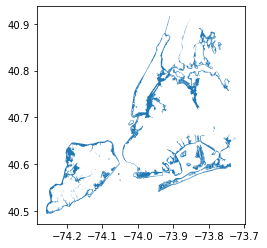

In [49]:
# plot SFHA layer
(firm_gdf
 .loc[firm_gdf['SFHA_TF'] == 'T']
 .plot()
)

# New York City Preliminary Flood Insurance Rate Map (PFIRM)
Source: https://r2-coastal-fema.hub.arcgis.com/pages/preliminary-flood-map-data

![fema-pfirm](images/fema-pfirm.png)

In [50]:
# url path from the web
product_id = '360497_PRELIMDB'
url = 'https://msc.fema.gov/portal/downloadProduct?productID={}'.format(product_id)
data = 'data/'

# download to data/ folder
fullfilename = os.path.join(data, 'fema-pfirm.zip')
urllib.request.urlretrieve(url, fullfilename)

%ls data/

fema-firm.zip         slr-rp100-y00.zip     stormwater-y00.zip
fema-pfirm.zip        slr-rp100-y30.zip     stormwater-y30.zip
hurricane-zones.zip   slr-rp500-y00.zip     stormwater-y60.zip
sandy-inundation.zip  slr-rp500-y30.zip


In [51]:
# reading in shape file
path = 'data/fema-pfirm.zip!s_fld_haz_ar.shp'
pfirm_gdf = gpd.read_file(path)

# examine data
print('shape of data: {}'.format(pfirm_gdf.shape))
pfirm_gdf.head()

shape of data: (3985, 15)


,FLD_AR_ID,FLD_ZONE,FLOODWAY,SFHA_TF,STATIC_BFE,V_DATUM,DEPTH,LEN_UNIT,VELOCITY,VEL_UNIT,AR_REVERT,BFE_REVERT,DEP_REVERT,SOURCE_CIT,geometry
0,81,AE,None,T,13.0,NAVD88,-9999.0,FEET,-9999.0,None,None,-9999.0,-9999.0,STUDY4,"POLYGON ((1032001.691 263867.839, 1032006.047 ..."
1,82,X,None,F,-9999.0,None,-9999.0,None,-9999.0,None,None,-9999.0,-9999.0,STUDY4,"POLYGON ((1033748.952 263778.464, 1033752.656 ..."
2,83,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,None,F,-9999.0,None,-9999.0,None,-9999.0,None,None,-9999.0,-9999.0,STUDY4,"POLYGON ((1033309.701 263544.181, 1033322.210 ..."
3,84,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,None,F,-9999.0,None,-9999.0,None,-9999.0,None,None,-9999.0,-9999.0,STUDY4,"POLYGON ((1033414.148 262658.868, 1033414.934 ..."
4,85,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,None,F,-9999.0,None,-9999.0,None,-9999.0,None,None,-9999.0,-9999.0,STUDY4,"POLYGON ((1034089.115 262466.034, 1034089.402 ..."


In [52]:
# examine crs
pfirm_gdf.crs

In [53]:
# manually set crs to 2263
pfirm_gdf = pfirm_gdf.set_crs(2263)
pfirm_gdf.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

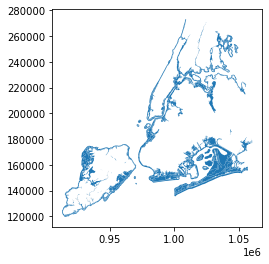

In [54]:
# plot SFHA layer
(pfirm_gdf
 .loc[pfirm_gdf['SFHA_TF'] == 'T']
 .plot()
)

In [55]:
# files in data folder
%ls data/

fema-firm.zip         slr-rp100-y00.zip     stormwater-y00.zip
fema-pfirm.zip        slr-rp100-y30.zip     stormwater-y30.zip
hurricane-zones.zip   slr-rp500-y00.zip     stormwater-y60.zip
sandy-inundation.zip  slr-rp500-y30.zip
